# Sepsis Mortality Mapping: Indirect Age Adjustment 

### Madeline Crawford
#### GEOG 5560 Fall 2023


## Abstract
The objective of this project was to use Python to code for multiple functions that would deliver an indirect age-adjusted death rate. Specifically, this code will help create a disease map for sepsis mortality across the United States using the indirect age-adjusted method. This project will employ pandas for data analysis and organization, geopandas, and matplotlib for geographic data and mapping. Calculating age-adjusted death rates requires lengthy datasets that cannot be edited or organized using any standard software or tool. This use of Python in this project is critical due to the datasets having hundreds of rows that cannot be edited in software like Microsoft Excel. Additionally, this code can be used for various other diseases, providing an efficient and accurate method for creating reliable disease maps.

## Introduction
Sepsis is a leading cause of death in the United States, with around 270,000 deaths each year (CDC 2023). To understand the trends and patterns of sepsis mortality in the United States, we can use disease maps to visualize the geographic and temporal trends of sepsis outcomes. Sepsis has a high incidence rate for elderly age groups, although it can affect anyone at any age. Since there is an age bias for sepsis deaths disease maps employ age-standardization, and most sepsis mortality maps use the direct age-adjustment method. 

However, this method could limit or underestimate the true nature of sepsis deaths in areas where data is lacking or even suppressed. One potential solution is to use Python for the application of a different method of age adjustment, specifically the indirect age-adjusted method. This report details the basis of calculating the indirect age=adjusted death rate for sepsis mortality across the US States from 2010-2020. To calculate the indirect age-adjusted death rate (AADR) the data required include standardized death rates by age group, total deaths by age group, and population counts by age group along with the SHP files for your geographic areas of interest. This project will also create functions for calculating expected deaths, observed deaths, and finally the indirect death rate. Through this project, I intend to make a step-by-step function-based code that can be used to plug in different disease rates and populations and compute the indirect death rate. I will use this code to create a map of the US and each state's indirect age-adjusted sepsis death rate from 2010-2020. Lastly, this project is a major component of my Master Thesis, which will use the same code as a building block for a new code that calculates indirect AADR at the county level.

## Study Area 

  The study area for this project is the United States, at the state-level from 2010-2020. Although, this code will be editied in the future so that    I can map out county level sepsis mortality as oppossed to state level mortality. 

![StudyArea](StudyArea.png)

## Data Used 
   * The data used in this project includes: 
       * CDC Wonder Data Portal - Underlying Cause of Death 
           * National or Average Sepsis Crude Death Rate per ten-year age group in the US 
           * Sepsis Death Count (by age group) in each State 
           * Population (by age group) per state
       * ArcGIS Online 
           * US State SHP file (ArcGIS online) 
     

In [34]:
pd.read_csv('US States Sepsis.csv')

,State_Name,State Code,Ten-Year Age Groups,Deaths,Population
0,Alabama,1,< 1 year,57,640373
1,Alabama,1,1-4 years,16,2624137
2,Alabama,1,5-14 years,13,6789869
3,Alabama,1,15-24 years,49,7259481
4,Alabama,1,25-34 years,137,6940387
...,...,...,...,...,...
556,Wyoming,56,45-54 years,31,792598
557,Wyoming,56,55-64 years,92,870127
558,Wyoming,56,65-74 years,117,560914
559,Wyoming,56,75-84 years,132,269189


In [35]:
import geopandas as gpd
us_states = gpd.read_file('USA_States')
print(us_states)

    FID          Program State_Code            State_Name Flowing_St  FID_1  \
0     1  PERMIT TRACKING         AL               ALABAMA          F    919   
1     2             None         AK                ALASKA          N    920   
2     3          AZURITE         AZ               ARIZONA          F    921   
3     4              PDS         AR              ARKANSAS          F    922   
4     5             None         CA            CALIFORNIA          N    923   
5     6           ECOMAP         CO              COLORADO          F    924   
6     7             SIMS         CT           CONNECTICUT          F    925   
7     8             None         DE              DELAWARE          P    926   
8     9             None         DC  DISTRICT OF COLUMBIA          P    927   
9    10             None         FL               FLORIDA          P    928   
10   11             None         GA               GEORGIA          N    929   
11   12           HI-EHW         HI                H

## Project Design 
The project is set up into two to three major steps, collect data and organize it into Jupyter, write the first draft of code, and edit and test code. The first two steps are the easiest, but the most important since I need to ensure the data is usable. 

The code is broken up into two major components. The first portion uses pandas and involves defining the standard crude rates, creating a function for summarizing observed deaths, calculating expected deaths, and using those two functions to calculate indirect death rates. The second part requires geopandas and Matplotlib, where I will import my geographic data (SHP Files) and merge it with the previous data frame for the indirect death rate. Finally, I will use Matplotlib to map out the results and produce a legend with four classes of equal interval death rates.


## Results and Discussions

#### 1. Data Loading and defining standard crude rates for sepsis by ten-year age group

In [36]:
import pandas as pd

# path to dataset for Sepsis deaths and population levels for each state
pd.read_csv('US States Sepsis.csv')

# define data path 
data = pd.read_csv('US States Sepsis.csv')

# define Standard crude rates for sepsis 
crude_rate_mapping = {
    "< 1 year": 4.2,
    "1-4 years": 0.3,
    "5-14 years": 0.1,
    "15-24 years": 0.3,
    "25-34 years": 0.8,
    "35-44 years": 2,
    "45-54 years": 5.6,
    "55-64 years": 13.7,
    "65-74 years": 30.1,
    "75-84 years": 71.8,
    "85+ years": 170.7}

#### 2. Functions for calculating expected deaths, aggregating expected deaths for all states, and calculating indirect death rates
#### 3. Iterating over States (For Loop) 
#### 4. Create data frame with final results 

In [37]:

def calculate_expected_deaths_for_state(state_data):
    # Add crude rate column 
    state_data['Crude Rate (standard)'] = state_data['Ten-Year Age Groups'].map(crude_rate_mapping)

    # calculate expected deaths for each age group
    state_data['Expected Deaths'] = state_data['Population'] * state_data['Crude Rate (standard)']

    # divide the output by 100,000
    state_data['Expected Deaths'] /= 100000

    return state_data[['State_Name', 'Ten-Year Age Groups', 'Expected Deaths']]

# function for calculating expected deaths using crude rates and population 
def calculate_expected_deaths_all_states(data):
    expected_deaths_all_states = {}
    for state, state_data in data.groupby('State_Name'):
        expected_deaths_all_states[state] = calculate_expected_deaths_for_state(state_data.copy())
    return expected_deaths_all_states

# function for calculating indirect death rate (crude rate, expected deaths, observed deaths)
def Indirect_death_rate(state, data, expected_deaths):
    national_crude_rate = 12.1
    total_observed_deaths = data[data['State_Name'] == state]['Deaths'].sum()
    total_expected_deaths = expected_deaths[state]['Expected Deaths'].sum()
    return (total_observed_deaths / total_expected_deaths) * national_crude_rate


# define expected deaths for all states
expected_deaths_all_states = calculate_expected_deaths_all_states(data)

# for loop for each state's indirect death rate
indirect_death_rates_all_states = {}
for state in data['State_Name'].unique():
    indirect_death_rates_all_states[state] = Indirect_death_rate(state, data, expected_deaths_all_states)

# create DataFrame with indirect death rates for all states
indirect_death_rates_df = pd.DataFrame(indirect_death_rates_all_states.items(), columns=['State_Name', 'Indirect Death Rate'])

# round death rate 
indirect_death_rates_df['Indirect Death Rate'] = indirect_death_rates_df['Indirect Death Rate'].round(1)
print(indirect_death_rates_df)


              State_Name  Indirect Death Rate
0                Alabama                 20.2
1                 Alaska                  8.9
2                Arizona                  5.7
3               Arkansas                 16.4
4             California                  4.1
5               Colorado                  9.0
6            Connecticut                 14.7
7               Delaware                 12.3
8   District of Columbia                 14.0
9                Florida                  9.0
10               Georgia                 18.3
11                Hawaii                  7.7
12                 Idaho                  6.3
13              Illinois                 14.1
14               Indiana                 16.6
15                  Iowa                  8.2
16                Kansas                 11.8
17              Kentucky                 18.8
18             Louisiana                 22.6
19                 Maine                  7.5
20              Maryland          

#### 5. Check data types before merging datasets

In [38]:
# Convert 'Indirect Death Rate' column to string
indirect_death_rates_df['Indirect Death Rate'] = indirect_death_rates_df['Indirect Death Rate'].astype(str)

# Merge with 'us_states'
merged = us_states.merge(indirect_death_rates_df, how='left', left_on='State_Name', right_on='State_Name')

#### 6. Import geopandas and matplotlib, and edit data so they can merge 

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
us_states = gpd.read_file('USA_States')
# Convert 'State_Name' column to lowercase
us_states['State_Name'] = us_states['State_Name'].str.lower()
indirect_death_rates_df['State_Name'] = indirect_death_rates_df['State_Name'].str.lower()

# Merge the Data 
merged = us_states.merge(indirect_death_rates_df, how='left', on='State_Name')

#### 7. Convert data, define data intervals and classes for legend, and decide visualizations for choropleth map

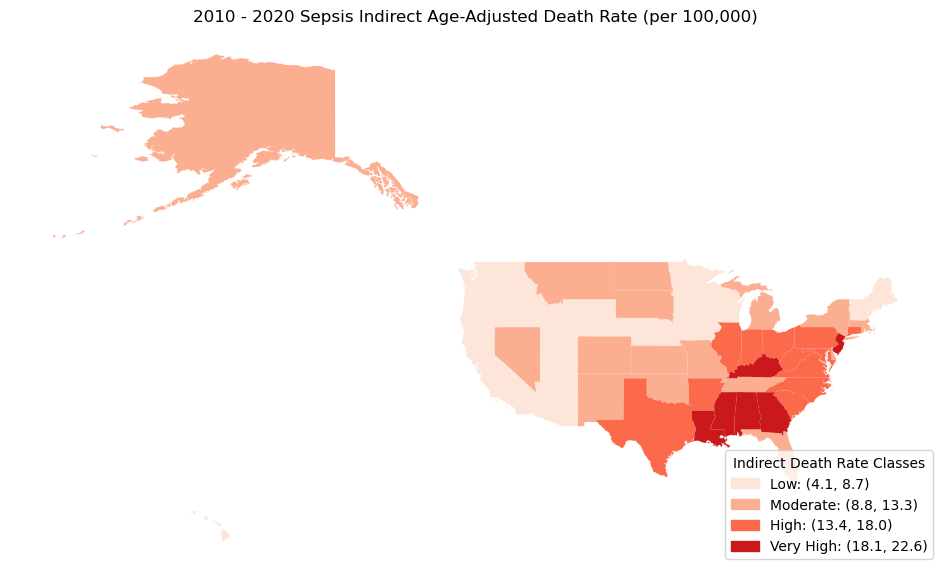

In [40]:

import matplotlib.patches as mpatches

# convert 'Indirect Death Rate' to numeric
merged['Indirect Death Rate'] = pd.to_numeric(merged['Indirect Death Rate'], errors='coerce')

# path to GeoDataFrame with geometry
gdf = gpd.GeoDataFrame(merged, geometry='geometry')

# define equal interval classes for death rates
class_intervals = {
    'Low': (4.1, 8.7),
    'Moderate': (8.8, 13.3),
    'High': (13.4, 18.0),
    'Very High': (18.1, 22.6)
}

# function for classifying death rates into the new classes
def classify_into_new_classes(value):
    for class_label, interval in class_intervals.items():
        if interval[0] <= value <= interval[1]:
            return class_label
    return None

# classification for new classes column 
gdf['Indirect Death Rate_Class'] = gdf['Indirect Death Rate'].apply(classify_into_new_classes)

# colors for each class
colors = ['#FEE5D9', '#FCAE91', '#FB6A4A', '#CB181D']

# plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for idx, class_label in enumerate(class_intervals.keys()):
    gdf[gdf['Indirect Death Rate_Class'] == class_label].plot(ax=ax, color=colors[idx], linewidth=0.8)

# legend 
legend_patches = [mpatches.Patch(color=colors[i], label=f'{class_label}: {class_intervals[class_label]}') for i, class_label in enumerate(class_intervals.keys())]

# display legend 
plt.legend(handles=legend_patches, loc='lower right', title='Indirect Death Rate Classes')

plt.title("2010 - 2020 Sepsis Indirect Age-Adjusted Death Rate (per 100,000)")
plt.axis('off')
plt.show()


## Conclusion 

The project focused on using Python to create a python code that can be used for computing indirect age-adjusted death rates, specifically to map sepsis mortality across the United States. With the use of Pandas, this project can deliver data analysis and geopandas/matplotlib for geospatial representation. This Python-based approach facilitated efficient data handling, offering a vital tool for complex data sets. Additionally, the code's versatility extends beyond sepsis, providing a method to generate disease maps for various diseases and health conditions. 


## Sources 
* Beyer, K. M., Tiwari, C., & Rushton, G. (2012). Five essential properties of disease maps. Annals of the Association of American Geographers, 102(5), 1067-1075
* Breslow, N. E., & Day, N. E. (1975). Indirect standardization and multiplicative models for rates, concerning the age adjustment of cancer incidence and relative frequency data. Journal of Chronic Diseases, 28(5-6), 289-303.
* Centers for Disease Control and Prevention [Internet]. Atlanta: Department of Health and Human Services. Sepsis: data & reports; 2016 Aug 23 [cited 2019 Sep 10]. Available from: https://www.cdc.gov/sepsis/datareports/index.html 
* Centers for Disease Control and Prevention. CDC Wonder. http://wonder.cdc.gov/. April 1995.





